 # Submitted by: Pushpendra Sharma

# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### K_means Clustering
### 1. Import Libraries

In [1]:
#  working with arrays
import numpy as np
# data visualization and graphical plotting
import matplotlib.pyplot as plt
# it offers data structures and operations for manipulating numerical tables and time series
import pandas as pd
# provides functions for generating a suite of test problems
from sklearn import datasets

### 2. Get The dataset

In [2]:
# This Dataset is present in datasets in sklearn library
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
# used to return top n (5 by default) rows of a data frame or series.1
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 3. Finding optimum numbers of clusters for K means

In [5]:
# First 4 columns are printed
x = df.iloc[:, [0, 1, 2, 3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# unsupervised machine learning algorithms that forms clusters of data based on the similarity between data instances
# number of clusters has to be defined beforehand
# K in the K-means refers to the number of clusters.
from sklearn.cluster import KMeans

In [7]:
# within cluster sum of squares
# For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square )
# WCSS is the sum of squared distance between each point and the centroid in a cluster
#  When we plot the WCSS with the K value, the plot looks like an Elbow
# number of clusters increases, the WCSS value will start to decrease
wcss = []

In [8]:
# To get the values used in the graph, we train multiple models using a different number of clusters 
# and storing the value of the intertia_ property (WCSS) every time.
# k-means++ ensures that you get don’t fall into the random initialization trap.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [9]:
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'

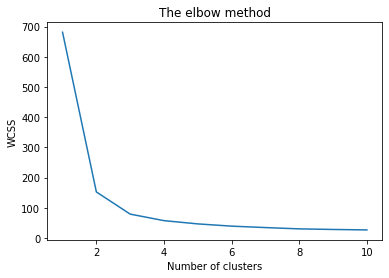

In [10]:
# number of clusters increases, the WCSS value will start to decrease
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [11]:
# Applying kmeans to the dataset / Creating the kmeans classifier

### Optimum number of clusters: 3

In [12]:
# categorize the data using the optimum number of clusters (3) we determined in the last step
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)

In [13]:
# it finds the centroids and assigns the labels to the dataset
y_kmeans = kmeans.fit_predict(x)

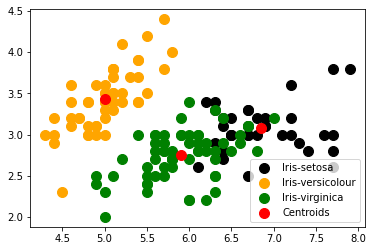

In [14]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters:
# cluster_centers: Predict the closest cluster each sample in X belongs to
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()